# ****Using 5 different sampling methods on 5 different models****

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/creditcard-data/Creditcard_data.csv


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.metrics import accuracy_score

In [4]:
df=pd.read_csv('/kaggle/input/creditcard-data/Creditcard_data.csv')

In [5]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,1
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
df.dtypes

Time        int64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [7]:
#dataframe only contains numeric data
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [8]:
#changing imbalanced to balanced dataset
#using oversampling

from imblearn.over_sampling import RandomOverSampler
x=df.drop('Class',axis=1)
y=df['Class']

ros=RandomOverSampler(random_state=42)

x_resampled,y_resampled=ros.fit_resample(x,y)
sampled_df=pd.concat([pd.DataFrame(x_resampled),pd.Series(y_resampled,name='Class')],axis=1)


In [9]:
sampled_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,1
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


(array([763.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   9.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

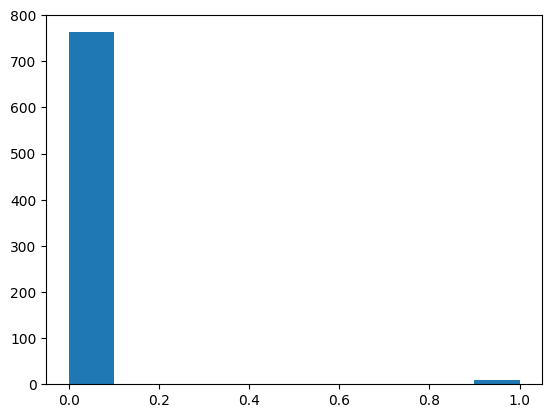

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.hist(x='Class',data=df)

(array([763.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 763.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

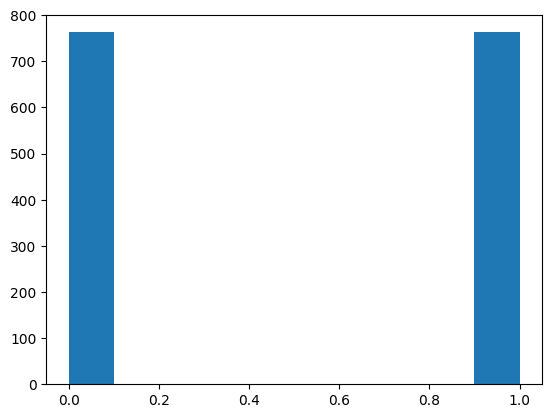

In [11]:
plt.hist(x='Class',data=sampled_df)

In [12]:
n=len(sampled_df)
N=len(df)
print(n,' ',N)

1526   772


In [13]:
#After converting to balanced dataset
#Random sampling
#for random sample, Z=1.96(95%),p=0.5,E=0.05

n1=(1.96*1.96*0.5*0.5)/(0.05*0.05)

sampled_data1=sampled_df.sample(n=int(n1),random_state=42)

In [14]:
sampled_data1.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
1439,164,0.073497,0.551033,0.451890,0.114964,0.822947,0.251480,0.296319,0.139497,-0.123050,...,-0.128758,-0.381932,0.151012,-1.363967,-1.389079,0.075412,0.231750,0.230171,0.99,1
76,49,-0.549626,0.418949,1.729833,0.203065,-0.187012,0.253878,0.500894,0.251256,-0.227985,...,0.115062,0.418529,-0.065133,0.264981,0.003958,0.395969,0.027182,0.043506,59.99,0
1010,118,1.254914,0.350287,0.302488,0.693114,-0.371470,-1.070256,0.086781,-0.202836,0.035154,...,-0.287592,-0.832682,0.128083,0.339427,0.215944,0.094704,-0.023354,0.030892,2.69,1
660,499,1.255439,0.307729,0.292700,0.699873,-0.428876,-1.088456,0.043840,-0.167739,0.128854,...,-0.294795,-0.882126,0.136846,0.327949,0.194459,0.096516,-0.027271,0.029491,1.98,0
1132,539,-1.738582,0.052740,1.187057,-0.656652,0.920623,-0.291788,0.269083,0.140631,0.023464,...,-0.179545,-0.192036,-0.261879,-0.237477,-0.335040,0.240323,-0.345129,-0.383563,1.00,1


In [15]:
#Systematic sampling
import math
k = int(math.sqrt(n))
sampled_data2 = sampled_df.iloc[::k]

In [16]:
sampled_data2.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
39,29,1.110880,0.168717,0.517144,1.325407,-0.191573,0.019504,-0.031849,0.117620,0.017665,...,-0.037709,0.095701,-0.048198,0.232115,0.606201,-0.342097,0.036770,0.007480,6.54,0
78,50,-0.571521,1.071600,1.280110,0.542780,0.574439,-0.259359,1.061148,-0.410972,-0.179130,...,0.003559,0.561240,-0.199287,0.001387,-0.179530,-0.374116,0.071641,-0.175510,9.79,0
117,76,-1.024576,0.522289,1.787699,0.202672,-1.140803,-0.137831,-0.336555,0.670704,0.071670,...,0.315868,0.847565,0.148877,0.549791,-0.585131,0.325841,-0.068871,0.059713,50.00,0
156,98,-0.646513,1.004199,1.616224,-0.099628,-0.122477,-0.671327,0.656183,0.009755,-0.635963,...,-0.147934,-0.420046,0.061424,0.520997,-0.238845,0.030135,0.140481,0.101163,14.98,0


In [17]:
# #Cluster sampling- taking avg size of cluster=5
# n2=(1.96*1.96*0.5*0.5)/(0.05*0.05/25)  #sample size

# import numpy as np
# sample_size = n2 #9604
# print(sample_size)
# cluster_size = 5
# num_clusters = sample_size // cluster_size

# sample_size = num_clusters * cluster_size
# cluster_indices = np.random.choice(n // cluster_size, size=num_clusters, replace=False)

# individual_indices = np.concatenate([np.arange(cluster * cluster_size, (cluster + 1) * cluster_size) for cluster in cluster_indices])
# individual_indices = individual_indices[:sample_size]

# # final datatset
# sampled_data3 = resampled_data.iloc[individual_indices]

In [18]:
#Cluster sampling using 5 clusters

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, n_init=10,random_state=42)
sampled_df['Cluster'] = kmeans.fit_predict(sampled_df.drop('Class', axis=1))

sampled_data3 = pd.concat([sampled_df[sampled_df['Cluster'] == i].sample(n=10, random_state=42 , replace = True) for i in range(5)], ignore_index=True)
sampled_data3 = sampled_data3.drop('Cluster', axis = 1)

In [19]:
#Stratified sampling with no. of strats=2
sampled_data4 = sampled_df.groupby('Class').apply(lambda x: x.sample(n=250, random_state=42)).reset_index(drop=True)
sampled_data4 = sampled_data4.drop('Cluster', axis = 1)

In [20]:
#For our 5th sampling method I have just taken the oversampled dataset without any further sampling on it

sampled_df=sampled_df.drop('Cluster',axis=1)
sampled_data5=sampled_df
list(sampled_data5)

['Time',
 'V1',
 'V2',
 'V3',
 'V4',
 'V5',
 'V6',
 'V7',
 'V8',
 'V9',
 'V10',
 'V11',
 'V12',
 'V13',
 'V14',
 'V15',
 'V16',
 'V17',
 'V18',
 'V19',
 'V20',
 'V21',
 'V22',
 'V23',
 'V24',
 'V25',
 'V26',
 'V27',
 'V28',
 'Amount',
 'Class']

In [21]:
#Now, using 5 samples on 5 models to find best combination

models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'KNN': KNeighborsClassifier(),
    'Gaussian Naive Bayes': GaussianNB()
}
X_train, X_test, y_train, y_test = train_test_split(sampled_df.drop('Class', axis=1), sampled_df['Class'], test_size=0.2, random_state=42)

In [22]:
X_train.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
196,130,-0.485238,0.658497,1.949967,1.249695,0.426410,0.231513,0.585115,0.029163,-0.520297,...,0.089378,0.007290,0.328244,-0.232563,0.225572,0.025892,-0.247395,-0.025381,-0.118565,5.97
752,561,1.214872,0.307970,0.278629,0.642981,-0.185161,-0.603602,0.006881,-0.064239,0.030872,...,-0.115172,-0.260682,-0.716148,0.159804,0.033516,0.143170,0.124259,-0.006506,0.027226,0.89
1283,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
81,52,1.147369,0.059035,0.263632,1.211023,-0.044096,0.301067,-0.132960,0.227885,0.252191,...,-0.255924,-0.087813,-0.110756,-0.097771,-0.323374,0.633279,-0.305328,0.027394,-0.000580,6.67
1429,484,-0.928088,0.398194,1.741131,0.182673,0.966387,-0.901004,0.879016,-0.156590,-0.142117,...,-0.118283,0.066353,0.281378,-0.257966,0.385384,0.391117,-0.453853,-0.104448,-0.125765,1.00


In [23]:
def fit_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred=model.predict(X_test)
    score=accuracy_score(y_test,y_pred)
    return score

In [24]:
#Lists containing samples and models
list1=[sampled_data1,sampled_data2,sampled_data3,sampled_data4,sampled_data5]
list2=list(models.keys())
list3=['Random Sampling','Systematic Sampling','Cluster Sampling','Stratified Sampling','Simple Over Sampling']

In [25]:
list2

['Logistic Regression',
 'Random Forest',
 'Decision Tree',
 'KNN',
 'Gaussian Naive Bayes']

In [ ]:
results=[]
for sample in list1:
    temp=[]
    for model_name in list2:
        accuracy=fit_model(models[model_name],sample.drop(['Class'],axis=1),sample['Class'],X_test,y_test)
        temp.append(accuracy)
    results.append(temp)

In [47]:
results

[[0.9248366013071896, 1.0, 1.0, 0.9673202614379085, 0.738562091503268],
 [0.7516339869281046,
  0.7908496732026143,
  0.7777777777777778,
  0.7450980392156863,
  0.7189542483660131],
 [0.7026143790849673,
  0.9150326797385621,
  0.9215686274509803,
  0.6764705882352942,
  0.6437908496732027],
 [0.8986928104575164,
  1.0,
  0.9836601307189542,
  0.9705882352941176,
  0.6862745098039216],
 [0.9150326797385621, 1.0, 1.0, 0.9934640522875817, 0.7745098039215687]]

In [35]:
dict1={}
j=0
for i in list3:
    dict1[i]=results[j]
    j=j+1
#results_df=pd.DataFrame(dict1,index=list2)

In [36]:
results_df=pd.DataFrame(dict1,index=list2)

In [46]:
print('Ignore the blocks with 1.0 accuracy')
results_df

Ignore the blocks with 1.0 accuracy


,Random Sampling,Systematic Sampling,Cluster Sampling,Stratified Sampling,Simple Over Sampling
Logistic Regression,0.924837,0.751634,0.702614,0.898693,0.915033
Random Forest,1.000000,0.790850,0.915033,1.000000,1.000000
Decision Tree,1.000000,0.777778,0.921569,0.983660,1.000000
KNN,0.967320,0.745098,0.676471,0.970588,0.993464
Gaussian Naive Bayes,0.738562,0.718954,0.643791,0.686275,0.774510
